https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [78]:

# Tratamiento de datos
import pandas as pd
import numpy as np
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, \
roc_curve, roc_auc_score, ConfusionMatrixDisplay, multilabel_confusion_matrix, r2_score, mean_absolute_percentage_error, mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv('data/temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [23]:
df_1 = df.copy()
df_2 = df.copy()

### 2. Lidia con las variables categóricas del dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [20]:
df.describe(include='all')

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
unique,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Tues,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2016.0,6.477011,15.514368,NaN,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,NaN,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,NaN,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,NaN,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,NaN,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,NaN,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000


In [21]:
df['week'].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs'], dtype=object)

In [24]:
df.week.values

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun',
       'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues',
       'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs',
       'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
       'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon',
       'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed',
       'Thurs', 'Fri', 'Sat', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri',
       'Sat', 'Sun', 'Mon', 'Tues', 'We

In [9]:
# clases

array(['Fri', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['week'] = le.fit_transform(df['week'])


In [26]:
df.week.values

array([0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,
       5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5,
       6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6,
       4, 0, 2, 3, 1, 5, 5, 3, 5, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4,
       0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0,
       2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2,
       1, 5, 6, 4, 0, 2, 3, 1, 5, 6, 4, 0, 2, 3, 1,

In [35]:
df_1_dumm = pd.get_dummies(df_1, columns=['week'], dtype=int)

In [36]:
df_1_dumm

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


In [10]:
# dummies

,Fri,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
343,0,0,0,0,0,1,0
344,0,0,0,0,0,0,1
345,0,0,0,0,1,0,0
346,1,0,0,0,0,0,0


In [14]:
# 'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6
# MAPEO


In [28]:
map_days = {'Mon':0,'Tues':1,'Wed':2,'Thurs':3,'Fri':4,'Sat':5,'Sun':6}
df_2['week'] = df_2['week'].map(map_days)


In [29]:
df_2

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,4,45,45,45.6,45,43,50,44,29
1,2016,1,2,5,44,45,45.7,44,41,50,44,61
2,2016,1,3,6,45,44,45.8,41,43,46,47,56
3,2016,1,4,0,44,41,45.9,40,44,48,46,53
4,2016,1,5,1,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,1,42,42,45.2,47,41,50,47,47
344,2016,12,28,2,42,47,45.3,48,41,49,44,58
345,2016,12,29,3,47,48,45.3,48,43,50,45,65
346,2016,12,30,4,48,48,45.4,57,44,46,44,42


In [41]:
# agurpar por mes y quedarse con la media de la columna temp_1
temp_mean = pd.DataFrame(df_1.groupby('month')['temp_1'].mean())

In [42]:
temp_mean

,temp_1
month,
1,49.677419
2,54.115385
3,56.483871
4,66.433333
5,68.838710
6,73.233333
7,76.225806
8,77.947368
9,70.428571


In [45]:
temp_act = pd.DataFrame(df_1.groupby('month')['actual'].mean())

In [46]:
temp_act

,actual
month,
1,49.741935
2,54.346154
3,57.096774
4,66.266667
5,69.193548
6,73.033333
7,76.225806
8,77.789474
9,70.321429


In [48]:
df_1_concat = pd.concat([temp_act,temp_mean], axis= 1)

In [49]:
df_1_concat

,actual,temp_1
month,,
1,49.741935,49.677419
2,54.346154,54.115385
3,57.096774,56.483871
4,66.266667,66.433333
5,69.193548,68.838710
6,73.033333,73.233333
7,76.225806,76.225806
8,77.789474,77.947368
9,70.321429,70.428571


In [40]:
df_1.groupby('month')['temp_1'].agg('mean')

month
1     49.677419
2     54.115385
3     56.483871
4     66.433333
5     68.838710
6     73.233333
7     76.225806
8     77.947368
9     70.428571
10    63.900000
11    56.966667
12    43.741935
Name: temp_1, dtype: float64

In [29]:
# merge del dataframe anterior con el original

c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and w

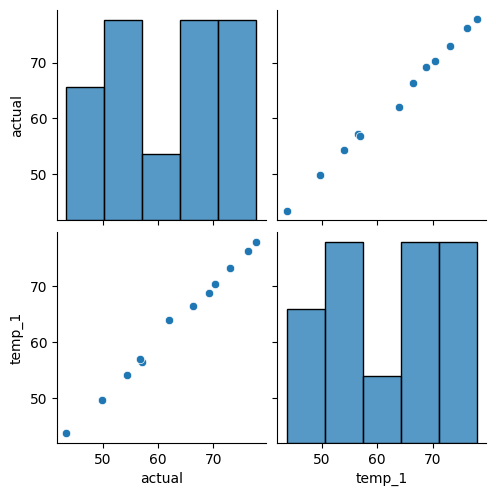

In [53]:
import seaborn as sns

sns.pairplot(df_1_concat)

c:\Users\laura\OneDrive\Desktop\DS_PT_09_2023\.venv\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

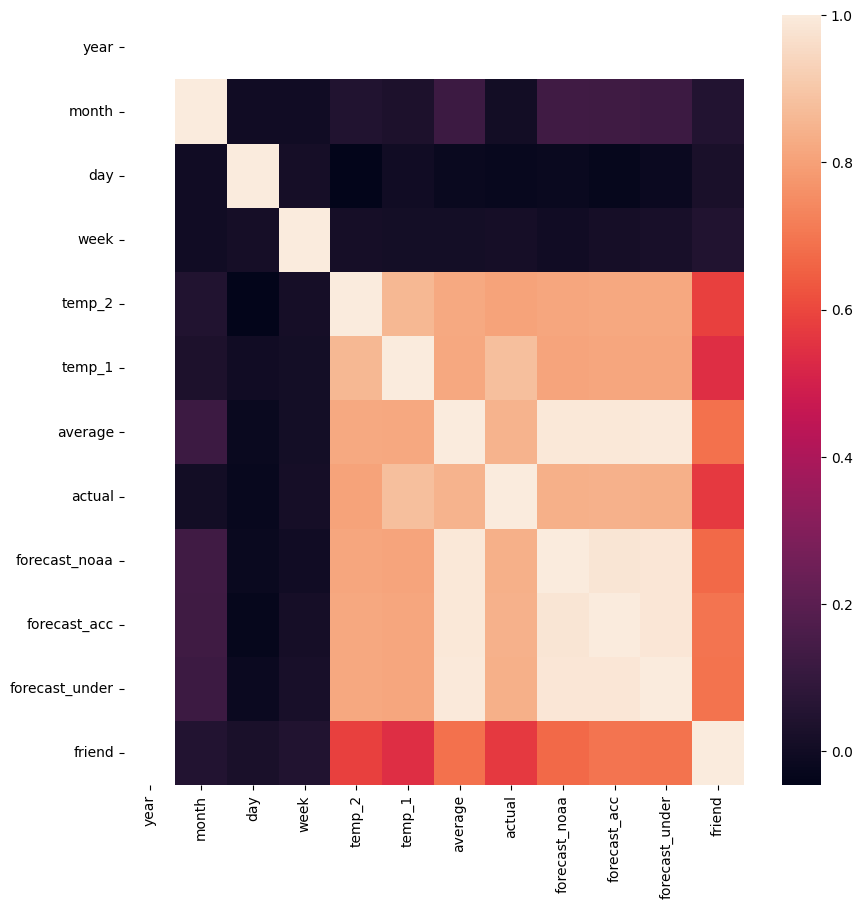

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

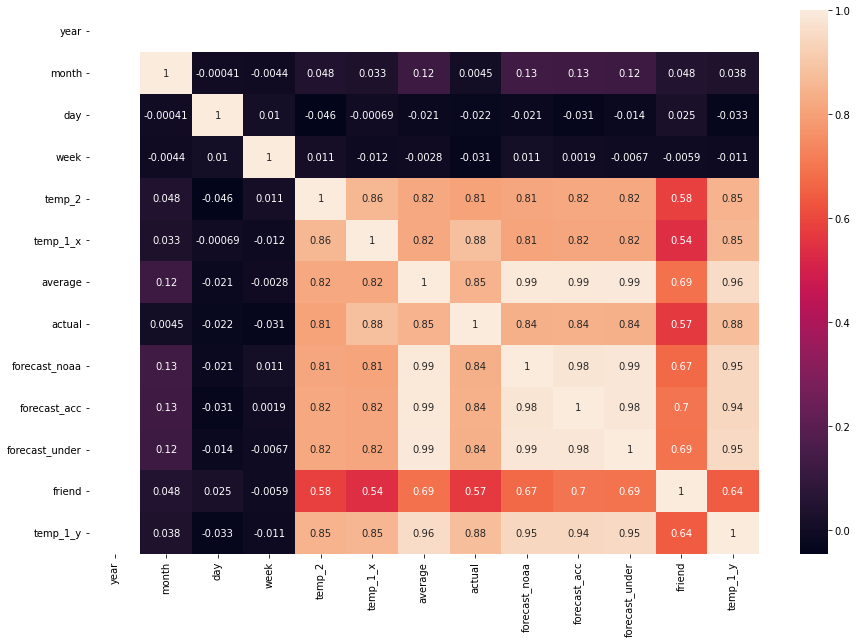

In [32]:
import matplotlib.pyplot as plt

### 3. Divide en train y test

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(df.drop(columns='actual', axis=1),df['actual'], test_size=0.2, random_state=42)

In [71]:
X_test

,year,month,day,week,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend
255,2016,9,29,4,69,68,66.1,63,71,68,57
114,2016,4,27,6,59,60,60.7,59,65,60,50
314,2016,11,28,1,53,48,48.0,46,48,49,44
268,2016,10,12,6,60,62,61.0,60,63,63,52
167,2016,6,19,3,67,65,70.4,69,73,70,58
...,...,...,...,...,...,...,...,...,...,...,...
93,2016,4,6,6,60,57,56.8,53,59,57,64
180,2016,7,2,2,73,76,73.3,70,77,73,84
183,2016,7,5,5,71,68,74.0,72,77,74,62
197,2016,7,19,5,80,73,76.6,76,78,77,90


In [72]:
X_train

,year,month,day,week,temp_2,temp_1,average,forecast_noaa,forecast_acc,forecast_under,friend
177,2016,6,29,6,85,79,72.6,68,76,74,81
78,2016,3,22,5,55,56,54.6,51,55,54,64
90,2016,4,3,3,71,63,56.3,54,61,56,64
16,2016,1,17,3,48,54,47.4,45,51,46,47
66,2016,3,10,4,54,55,52.8,49,55,53,50
...,...,...,...,...,...,...,...,...,...,...,...
188,2016,7,10,3,74,71,75.1,71,77,76,95
71,2016,3,15,5,54,49,53.6,49,58,52,70
106,2016,4,19,5,77,89,59.0,59,63,59,61
270,2016,10,14,0,66,60,60.2,56,64,60,78


### 4. Entrena el modelo


In [59]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor(max_depth=4, random_state=42)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [60]:
X_train.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')

In [61]:
dtr.feature_importances_

array([0.        , 0.01399239, 0.0028181 , 0.        , 0.        ,
       0.85161564, 0.08962928, 0.00541114, 0.0166184 , 0.01991505,
       0.        ])

In [36]:
dtr.feature_importances_

array([0.01864284, 0.02306268, 0.76979138, 0.09715291, 0.01512062,
       0.02218712, 0.03053199, 0.0179435 , 0.00556695])

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [65]:
y_train.shape

(278,)

In [64]:
y_test.shape

(70,)

In [81]:
y_pred = dtr.predict(X_test)

array([80., 68., 57., 64., 72., 76., 73., 79., 68., 81., 68., 67., 39.,
       59., 78., 57., 63., 54., 55., 79., 63., 57., 70., 59., 64., 48.,
       66., 45., 60., 77., 66., 64., 57., 88., 73., 60., 51., 51., 74.,
       40., 77., 54., 81., 41., 58., 76., 55., 79., 52., 39., 40., 39.,
       63., 64., 74., 61., 55., 61., 60., 57., 60., 46., 60., 71., 68.,
       57., 71., 67., 80., 39.])

In [82]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7808716556460724
MAE 4.211293169322524
MAPE 0.06564409571791573
MSE 30.63968782939335
RMSE 5.5353128032111565


### 6. Representa el árbol de decision

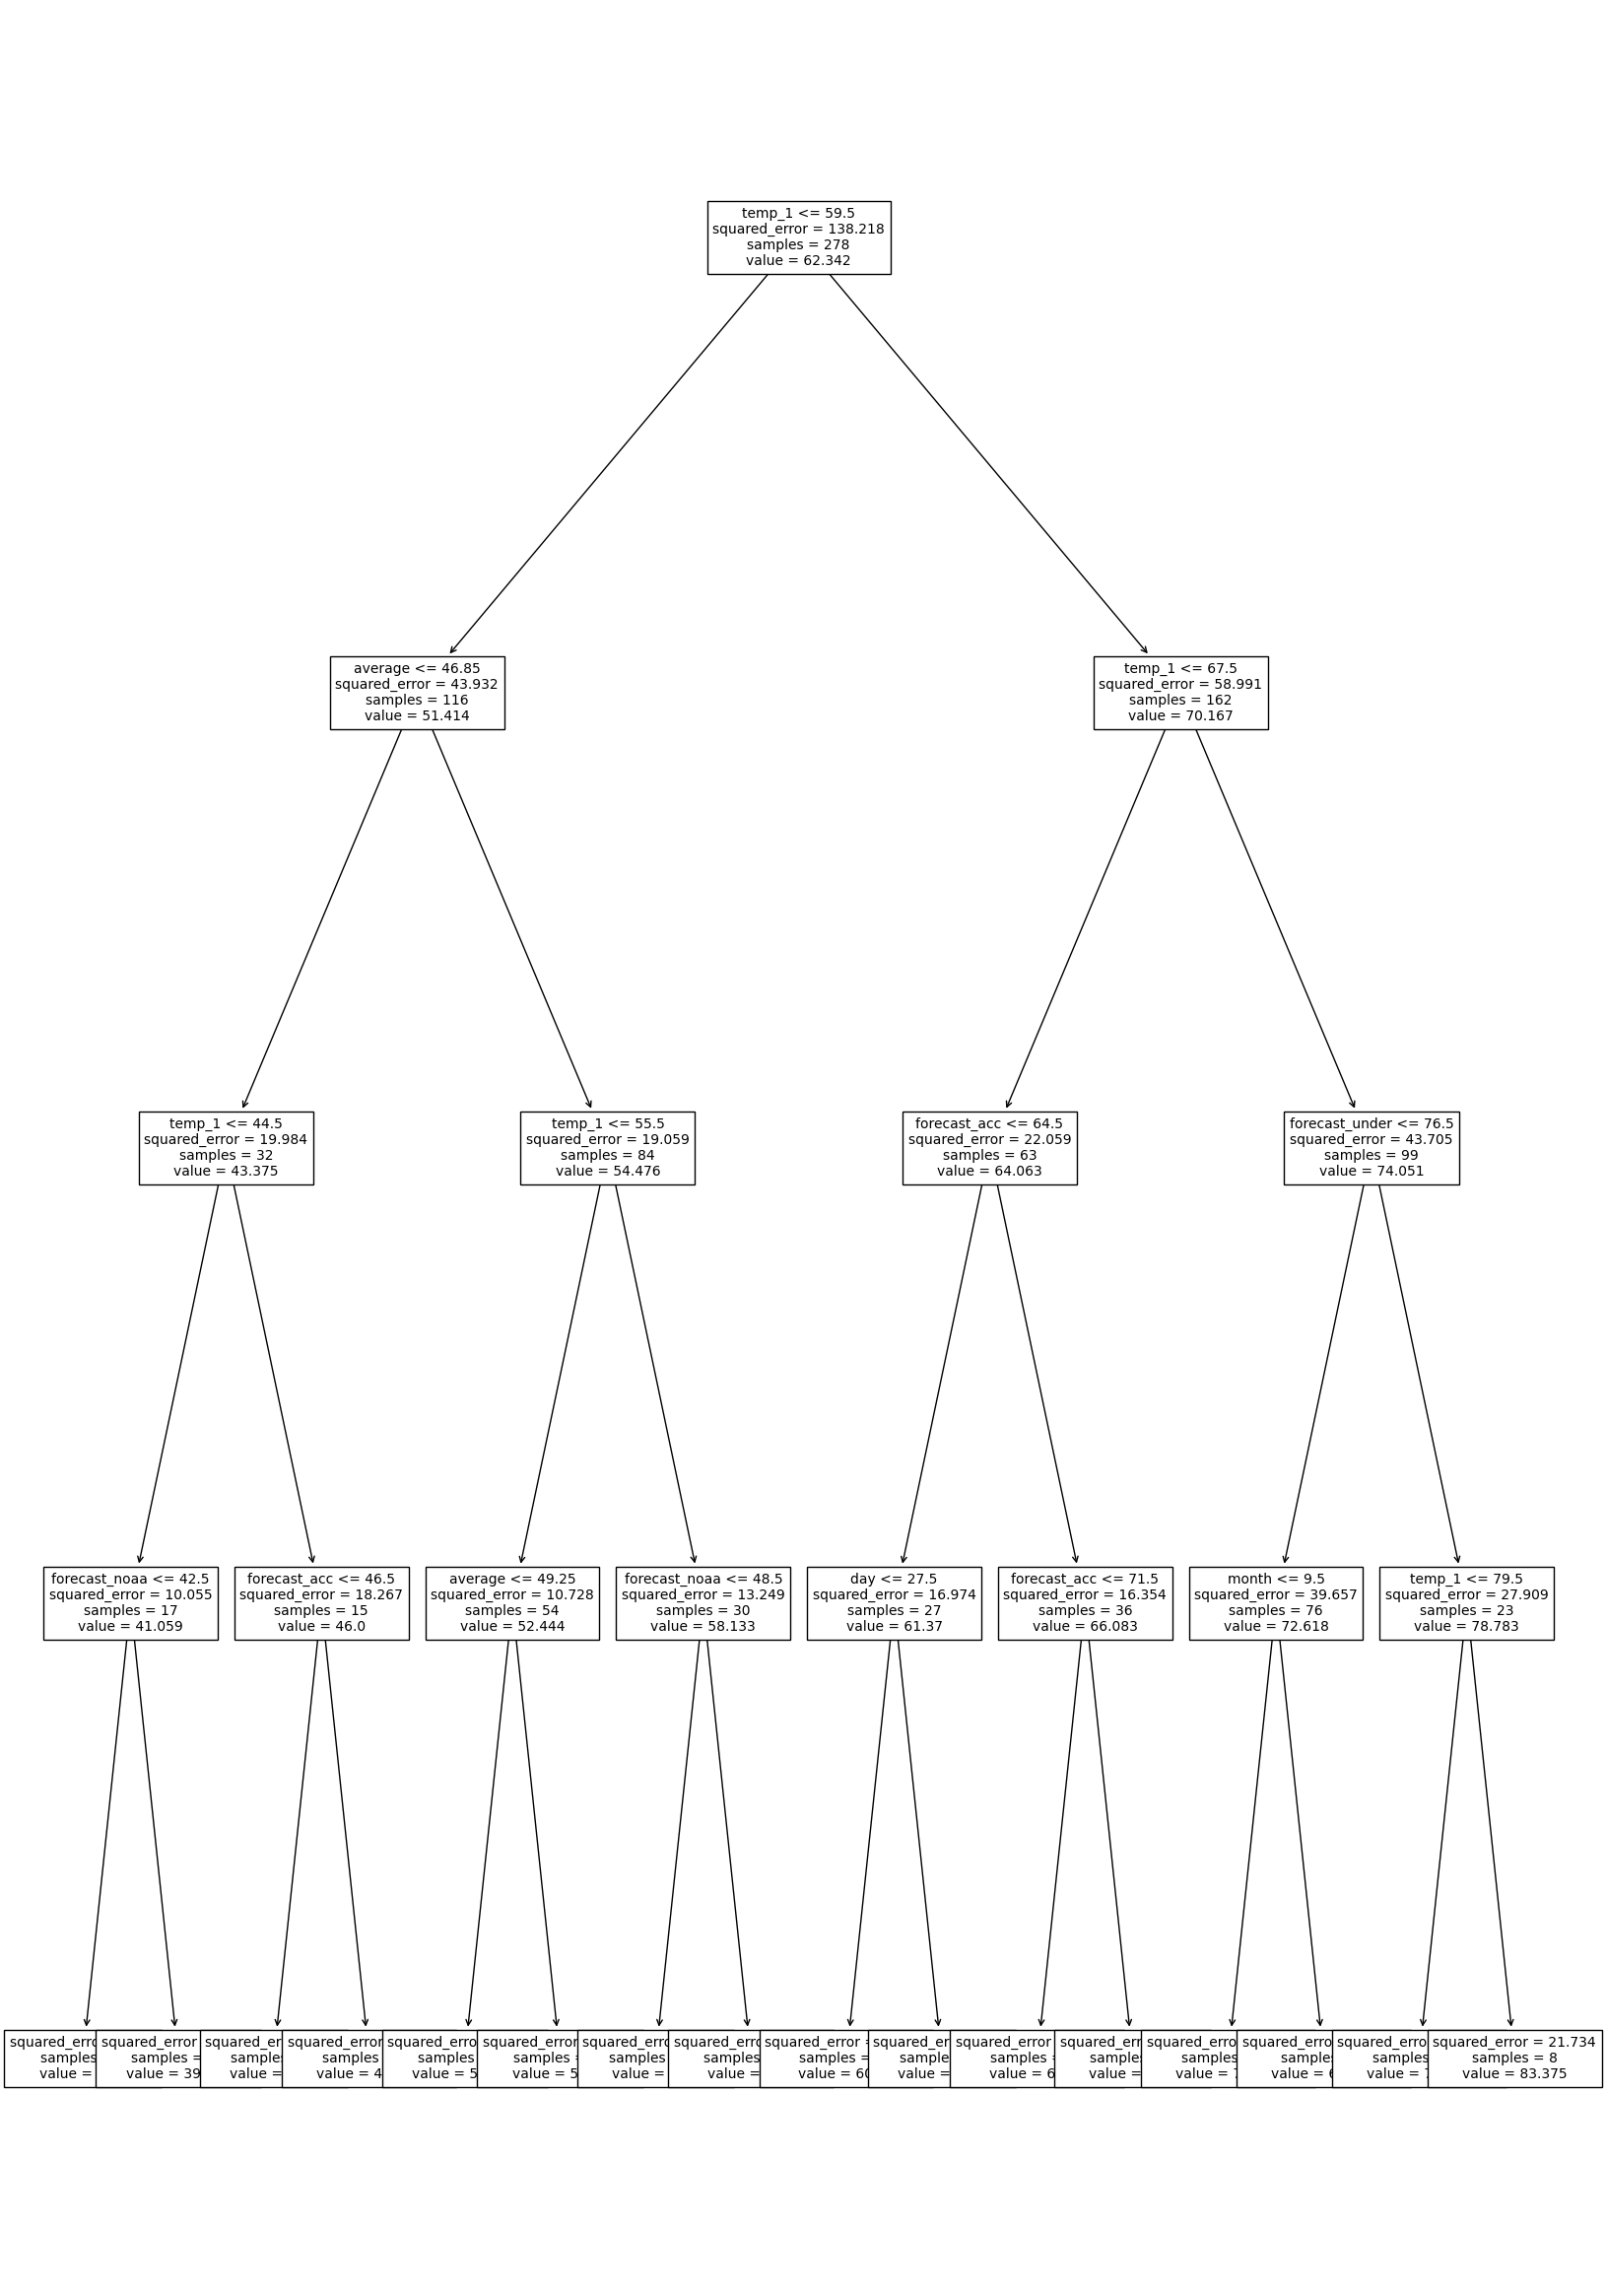

In [84]:
plt.figure(figsize=(20,30))

plot_tree(dtr, feature_names = X_train.columns, fontsize=10);

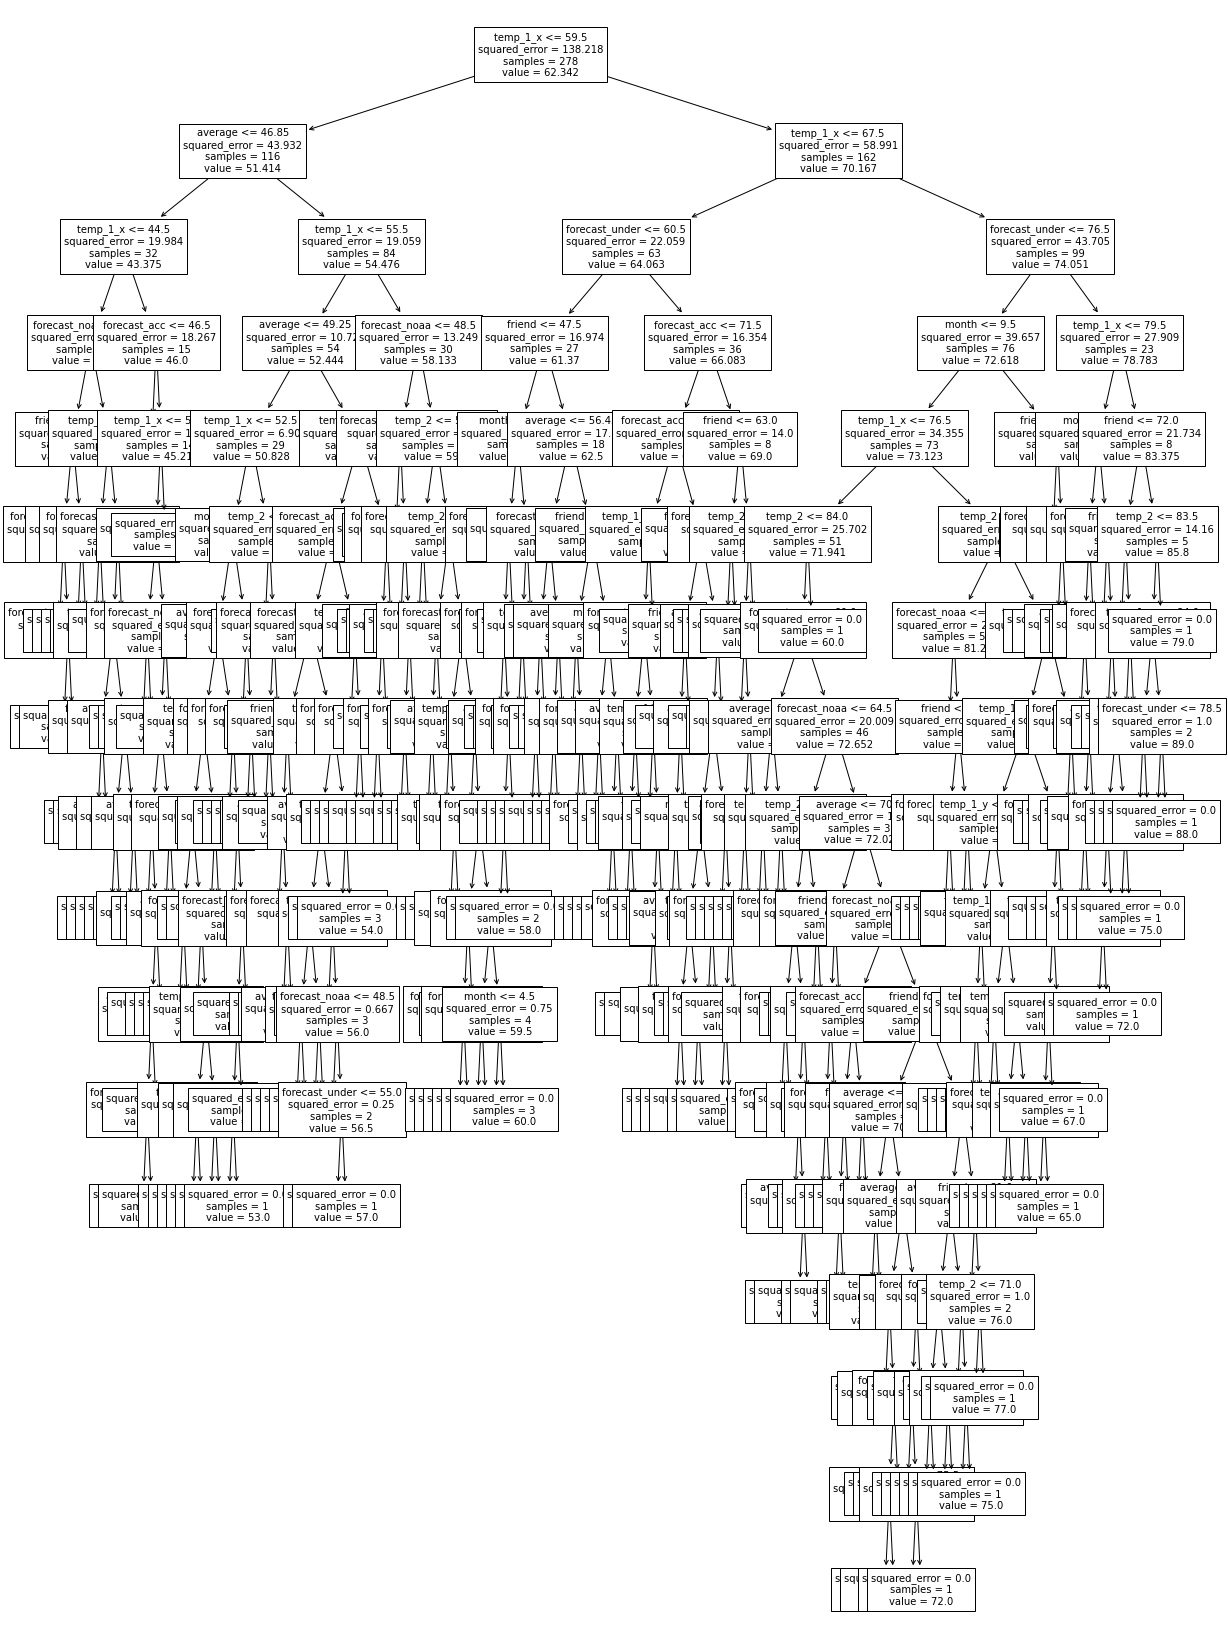

In [47]:
# plt.figure(figsize=(20,30))

# plot_tree(dtr, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [75]:
dtr_3 = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr_3.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

### 8. Vuelve a evaluar tu modelo

In [80]:
y_pred3 = dtr_3.predict(X_test)
print("Coeficiente determinación", r2_score(y_test, y_pred3))
print("MAE", mean_absolute_error(y_test, y_pred3))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred3))
print("MSE", mean_squared_error(y_test, y_pred3))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred3)))

Coeficiente determinación 0.7608677663462975
MAE 4.424444494299118
MAPE 0.06938377135428464
MSE 33.43673777437395
RMSE 5.782450844959596


### 9. Vuelve a representar su árbol

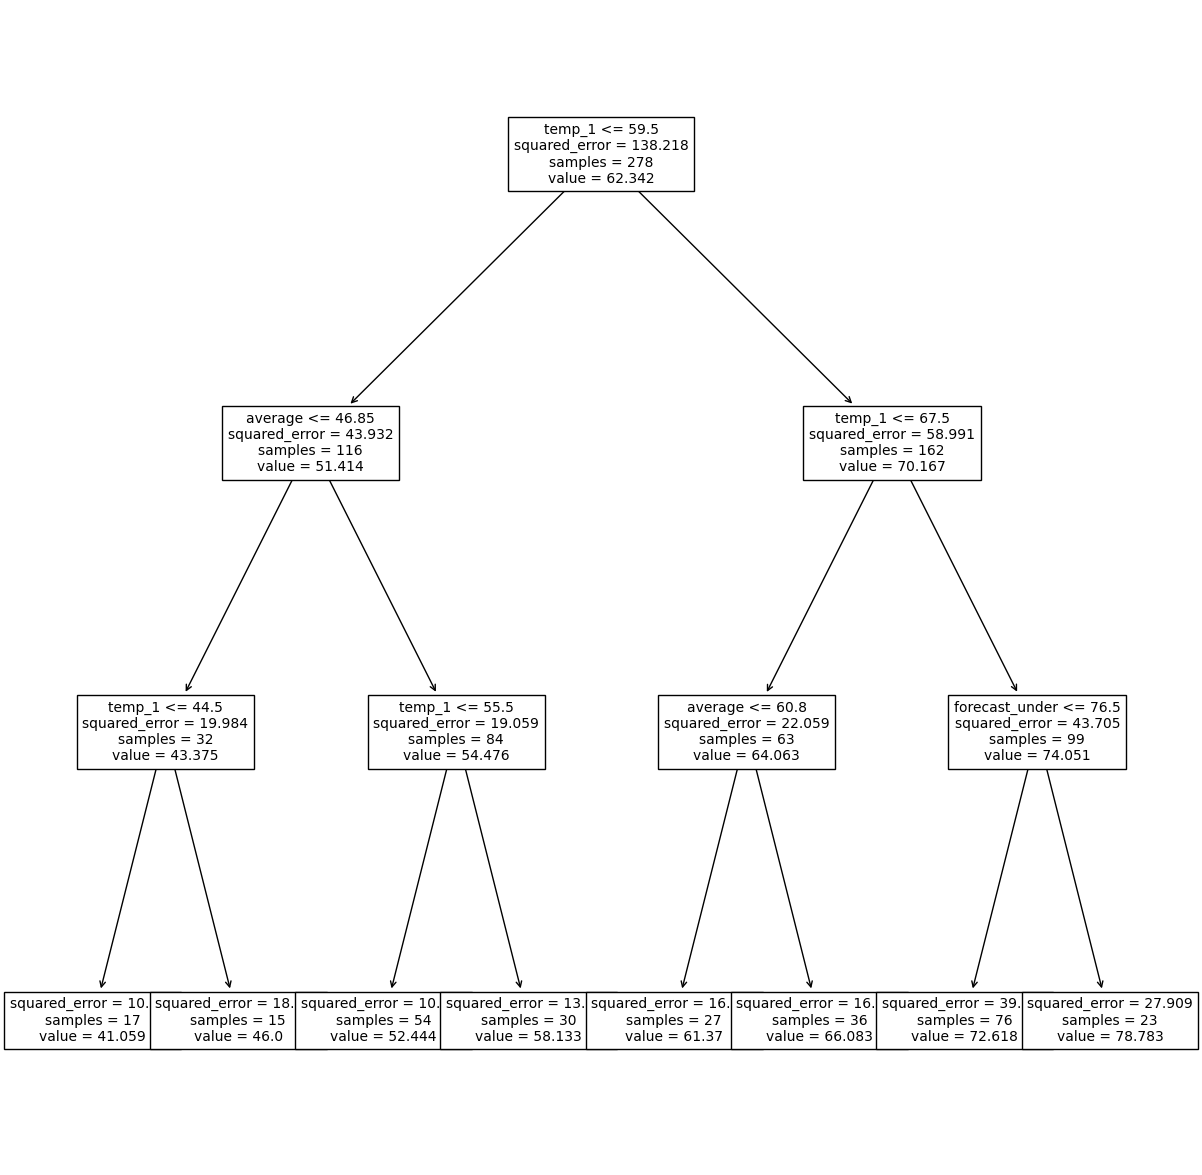

In [87]:
plt.figure(figsize=(15,15))

plot_tree(dtr_3, feature_names = X_train.columns, fontsize=10); #max_depth cambia la profundidad de la visualización

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [88]:
dtr_3.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.88020751, 0.09902152, 0.        , 0.        , 0.02077097,
       0.        ])

In [89]:
X_train.columns

Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')

In [90]:
pd.DataFrame({'features':X_train.columns, 'importances':dtr_3.feature_importances_}).sort_values('importances', ascending=False)

,features,importances
5,temp_1,0.880208
6,average,0.099022
9,forecast_under,0.020771
0,year,0.000000
1,month,0.000000
2,day,0.000000
3,week,0.000000
4,temp_2,0.000000
7,forecast_noaa,0.000000
8,forecast_acc,0.000000


In [69]:
X_train, X_test, y_train, y_test = train_test_split(df[['temp_1_x','average','forecast_under']], df['actual'], test_size=0.2, random_state=42)

In [70]:
dtr_3 = DecisionTreeRegressor(max_depth=3)
dtr_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [71]:
print("Coeficiente determinación", r2_score(y_test, y_pred))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))

Coeficiente determinación 0.7608677663462975
MAE 4.424444494299118
MAPE 0.06938377135428464
MSE 33.43673777437395
RMSE 5.782450844959596


### 11. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día no va a hacer una temperatura máxima a 15ºC

,actual,target_clas
0,45,0
1,44,0
2,41,0
3,40,0
4,44,0


<AxesSubplot:>

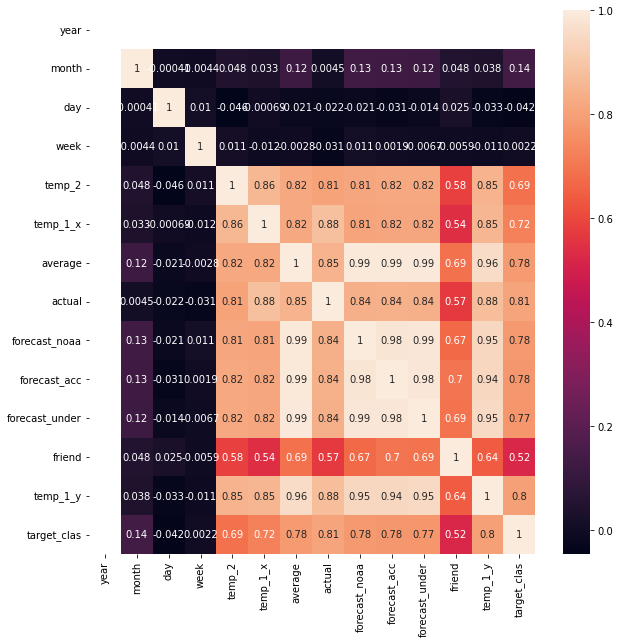

In [79]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [81]:
df['target_clas'].value_counts()

1    204
0    144
Name: target_clas, dtype: int64

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['year','day','week','actual','target_clas']), df['target_clas'], test_size=0.2, random_state=42)

In [88]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [94]:
X_train.columns

Index(['month', 'temp_2', 'temp_1_x', 'average', 'forecast_noaa',
       'forecast_acc', 'forecast_under', 'friend', 'temp_1_y'],
      dtype='object')

In [93]:
dtc.feature_importances_

array([0.        , 0.        , 0.08751759, 0.83792502, 0.05793051,
       0.        , 0.01076818, 0.0058587 , 0.        ])

In [89]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,dtc.predict(X_test))

0.9

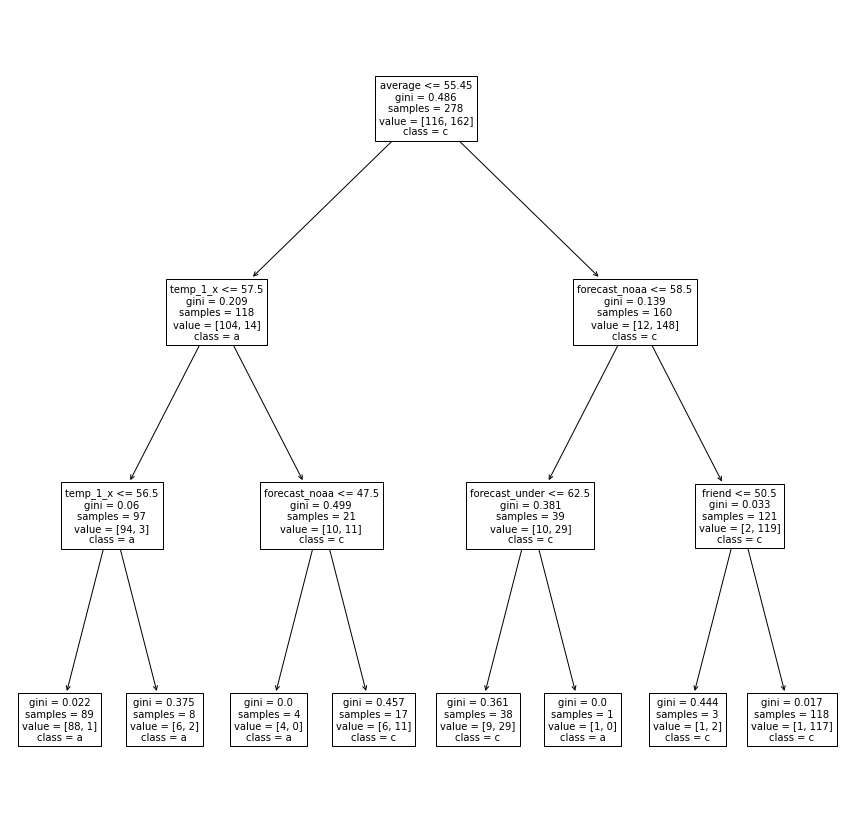

In [90]:
plt.figure(figsize=(15,15))

plot_tree(dtc, feature_names = X_train.columns, class_names = 'actual', fontsize=10); #max_depth cambia la profundidad de la visualización

In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

accuracy_score(y_test,lr.predict(X_test))

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8428571428571429

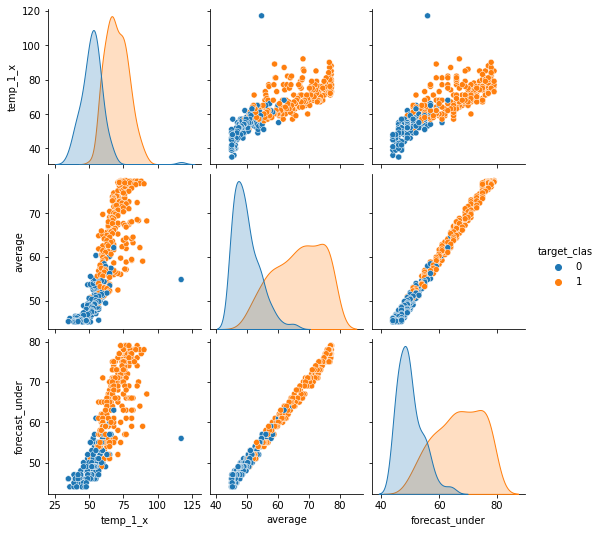

In [97]:
sns.pairplot(df[['temp_1_x','average','forecast_under','target_clas']], hue='target_clas')